In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from google.colab import drive

In [106]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
img_bgr = cv2.imread("/content/drive/MyDrive/Images/7/harris.JPG")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

In [108]:
def corner_response_calculator (image, alpha):
  blured_image = cv2.GaussianBlur(image, (3,3), 0)
  
  I_x = cv2.Sobel(blured_image, cv2.CV_64F, 1, 0, ksize=3)
  I_y = cv2.Sobel(blured_image, cv2.CV_64F, 0, 1, ksize=3)

  I_x2 = np.square(I_x)
  I_y2 = np.square(I_y)
  I_xy = I_x * I_y

  I_x2 = gaussian_filter(I_x2, 1)
  I_y2 = gaussian_filter(I_y2, 1)
  I_xy = gaussian_filter(I_xy, 1)

  window_size = 5
  offset = window_size // 2
  
  R, C = blured_image.shape
  harris_response = np.zeros((R, C))

  for r in range(offset, R - offset):
    for c in range(offset, C - offset):
      S_x2 = np.sum(I_x2[r - offset : r + 1 + offset, c - offset : c + 1 + offset])
      S_y2 = np.sum(I_y2[r - offset : r + 1 + offset, c - offset : c + 1 + offset])
      S_xy = np.sum(I_xy[r - offset : r + 1 + offset, c - offset : c + 1 + offset])

      second_moment_mastrix = np.array([[S_x2,S_xy], [S_xy,S_y2]])
      determinant = np.linalg.det(second_moment_mastrix)
      trace = np.matrix.trace(second_moment_mastrix)
      har = determinant - alpha * (trace ** 2)
      harris_response[r - offset, c - offset] = har

  cv2.normalize(harris_response, harris_response, 0, 1, cv2.NORM_MINMAX)
  return harris_response

In [109]:
def corner_specification (image, harris_response, threshold):
  corner_specified_image = image.copy()

  R, C, ch = image.shape

  window_size = 5
  offset = window_size // 2
  feature_count = 0

  for r in range(offset, R - offset):
    for c in range(offset, C - offset):
      if harris_response[r][c] > threshold:
        corner_specified_image[r][c] = [255, 0, 0]
        feature_count += 1

  return corner_specified_image, feature_count

In [110]:
def harris_corner_detector (image_rgb, image_gray, alpha, threshold):
  harris_response = corner_response_calculator(image_gray, alpha)
  corner_specified_image, feature_count = corner_specification(image_rgb, harris_response, threshold)
  return corner_specified_image, feature_count

Text(0.5, 1.0, 'Image: Grayscale')

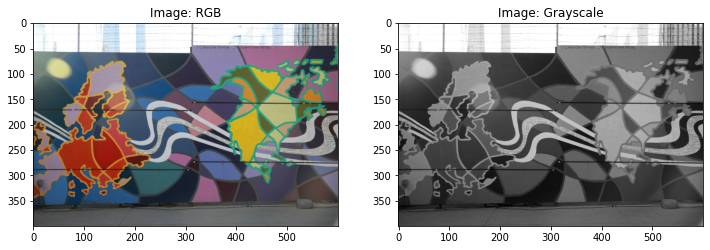

In [111]:
fig, plot = plt.subplots(1, 2, figsize = (12, 6))

plot[0].imshow(img_rgb)
plot[0].set_title("Image: RGB")

plot[1].imshow(img_gray, cmap='gray')
plot[1].set_title("Image: Grayscale")

In [112]:
image_scale_1_gray = img_gray
image_scale_1_rgb = img_rgb

image_scale_2_gray = cv2.pyrDown(image_scale_1_gray)
image_scale_2_rgb = cv2.pyrDown(image_scale_1_rgb)

image_scale_3_gray = cv2.pyrDown(image_scale_2_gray)
image_scale_3_rgb = cv2.pyrDown(image_scale_2_rgb)

image_scale_4_gray = cv2.pyrDown(image_scale_3_gray)
image_scale_4_rgb = cv2.pyrDown(image_scale_3_rgb)

Feature Counts:
With Alpha = 0.04

With Threshold = 0.25
Scale = 1 -> Feature Count = 1141
Scale = 2 -> Feature Count = 10396
Scale = 3 -> Feature Count = 13957
Scale = 4 -> Feature Count = 3243

With Threshold = 0.5
Scale = 1 -> Feature Count = 17
Scale = 2 -> Feature Count = 18
Scale = 3 -> Feature Count = 1062
Scale = 4 -> Feature Count = 2987

With Threshold = 0.75
Scale = 1 -> Feature Count = 6
Scale = 2 -> Feature Count = 6
Scale = 3 -> Feature Count = 14
Scale = 4 -> Feature Count = 28

With Alpha = 0.05

With Threshold = 0.25
Scale = 1 -> Feature Count = 220825
Scale = 2 -> Feature Count = 57090
Scale = 3 -> Feature Count = 13965
Scale = 4 -> Feature Count = 3245

With Threshold = 0.5
Scale = 1 -> Feature Count = 20
Scale = 2 -> Feature Count = 19
Scale = 3 -> Feature Count = 13668
Scale = 4 -> Feature Count = 3189

With Threshold = 0.75
Scale = 1 -> Feature Count = 6
Scale = 2 -> Feature Count = 6
Scale = 3 -> Feature Count = 18
Scale = 4 -> Feature Count = 40

With Alpha = 0.

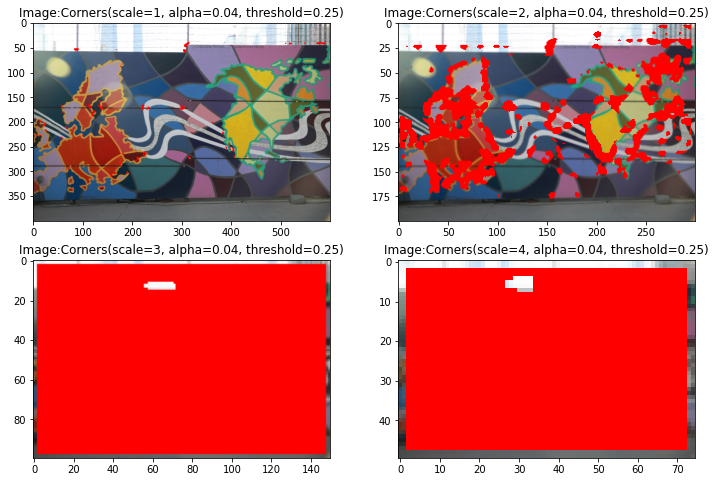

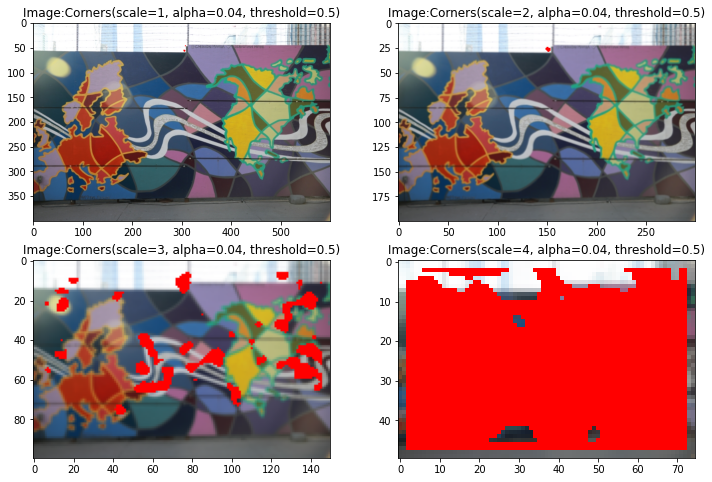

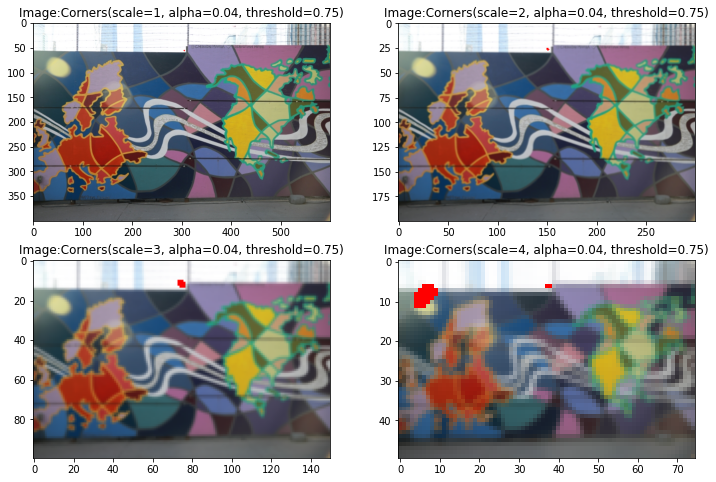

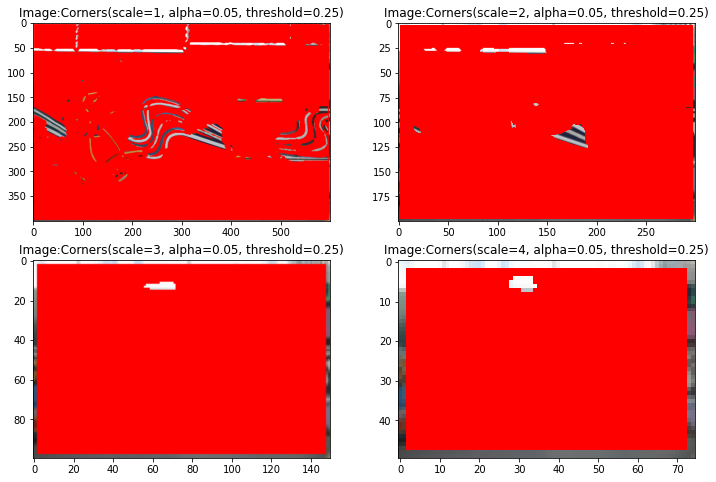

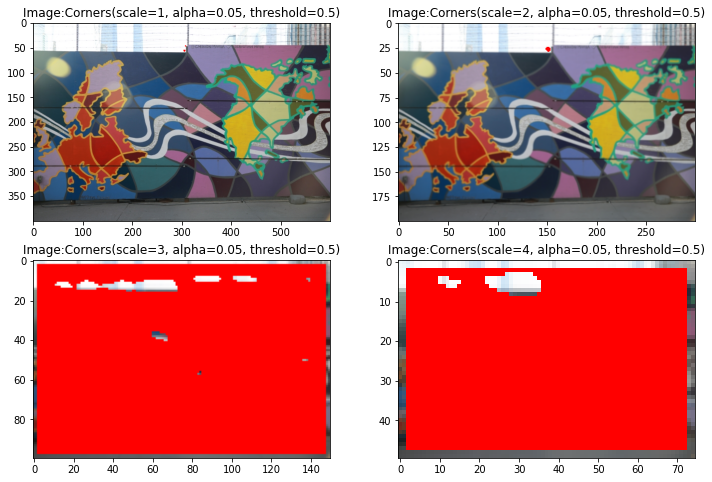

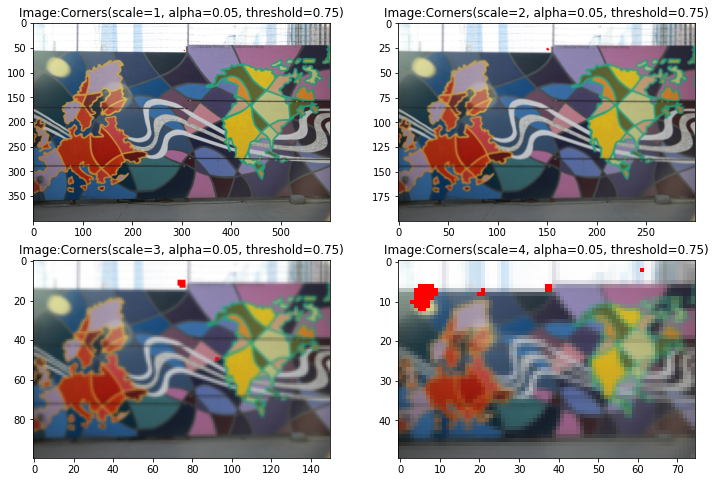

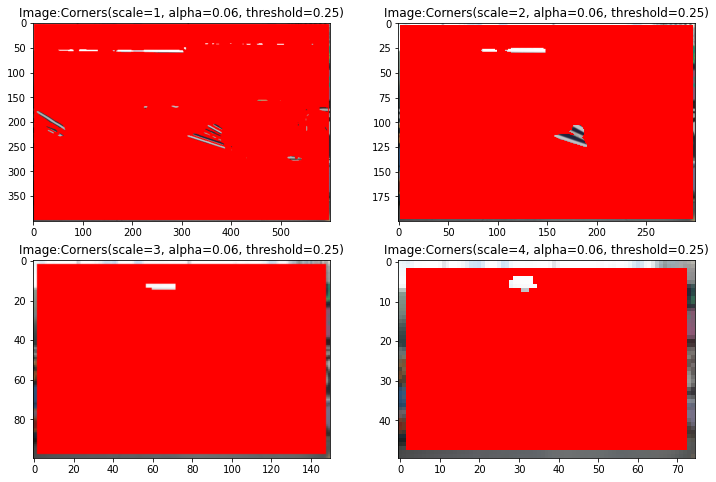

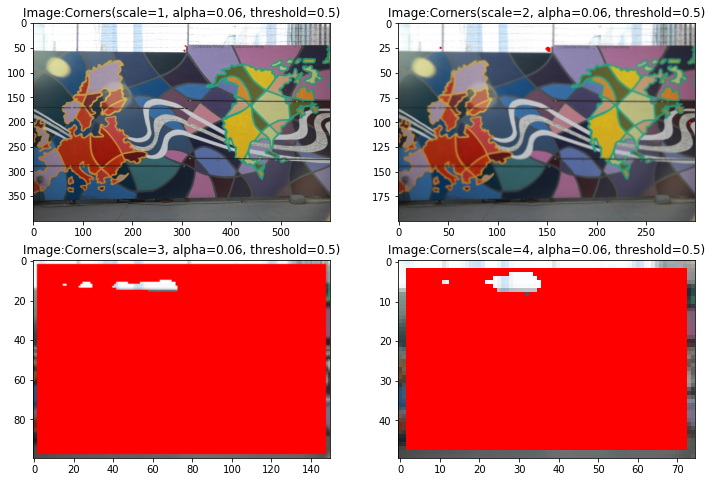

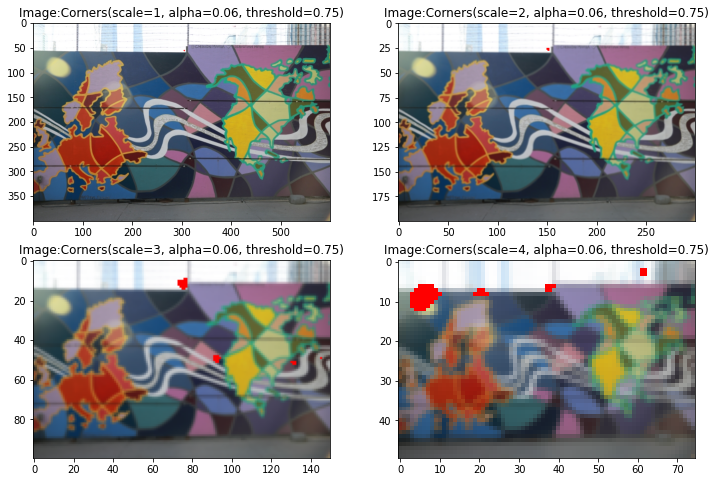

In [120]:
thresholds = [0.25, 0.5, 0.75]
alphas = [0.04, 0.05, 0.06]

print("Feature Counts:")
for alpha_index in range (len(alphas)):
  alpha = alphas[alpha_index]
  print("With Alpha = " + str(alpha) + "\n")
  for threshold_index in range (len(thresholds)):
    threshold = thresholds[threshold_index]
    print("With Threshold = " + str(threshold))

    fig, plot = plt.subplots(2, 2, figsize = (12, 8))

    corner_specified_image_scale_1, feature_count_scale_1 = harris_corner_detector(image_scale_1_rgb, image_scale_1_gray, alpha, threshold)
    plot[0][0].imshow(corner_specified_image_scale_1)
    plot[0][0].set_title("Image:Corners(scale=1, alpha=" + str(alpha) + ", threshold=" + str(threshold) + ")")

    corner_specified_image_scale_2, feature_count_scale_2 = harris_corner_detector(image_scale_2_rgb, image_scale_2_gray, alpha, threshold)
    plot[0][1].imshow(corner_specified_image_scale_2)
    plot[0][1].set_title("Image:Corners(scale=2, alpha=" + str(alpha) + ", threshold=" + str(threshold) + ")")

    corner_specified_image_scale_3, feature_count_scale_3 = harris_corner_detector(image_scale_3_rgb, image_scale_3_gray, alpha, threshold)
    plot[1][0].imshow(corner_specified_image_scale_3)
    plot[1][0].set_title("Image:Corners(scale=3, alpha=" + str(alpha) + ", threshold=" + str(threshold) + ")")

    corner_specified_image_scale_4, feature_count_scale_4 = harris_corner_detector(image_scale_4_rgb, image_scale_4_gray, alpha, threshold)
    plot[1][1].imshow(corner_specified_image_scale_4)
    plot[1][1].set_title("Image:Corners(scale=4, alpha=" + str(alpha) + ", threshold=" + str(threshold) + ")")

    print("Scale = 1 -> Feature Count = " + str(feature_count_scale_1))
    print("Scale = 2 -> Feature Count = " + str(feature_count_scale_2))
    print("Scale = 3 -> Feature Count = " + str(feature_count_scale_3))
    print("Scale = 4 -> Feature Count = " + str(feature_count_scale_4) + "\n")